## PROJECT OVERVIEW 


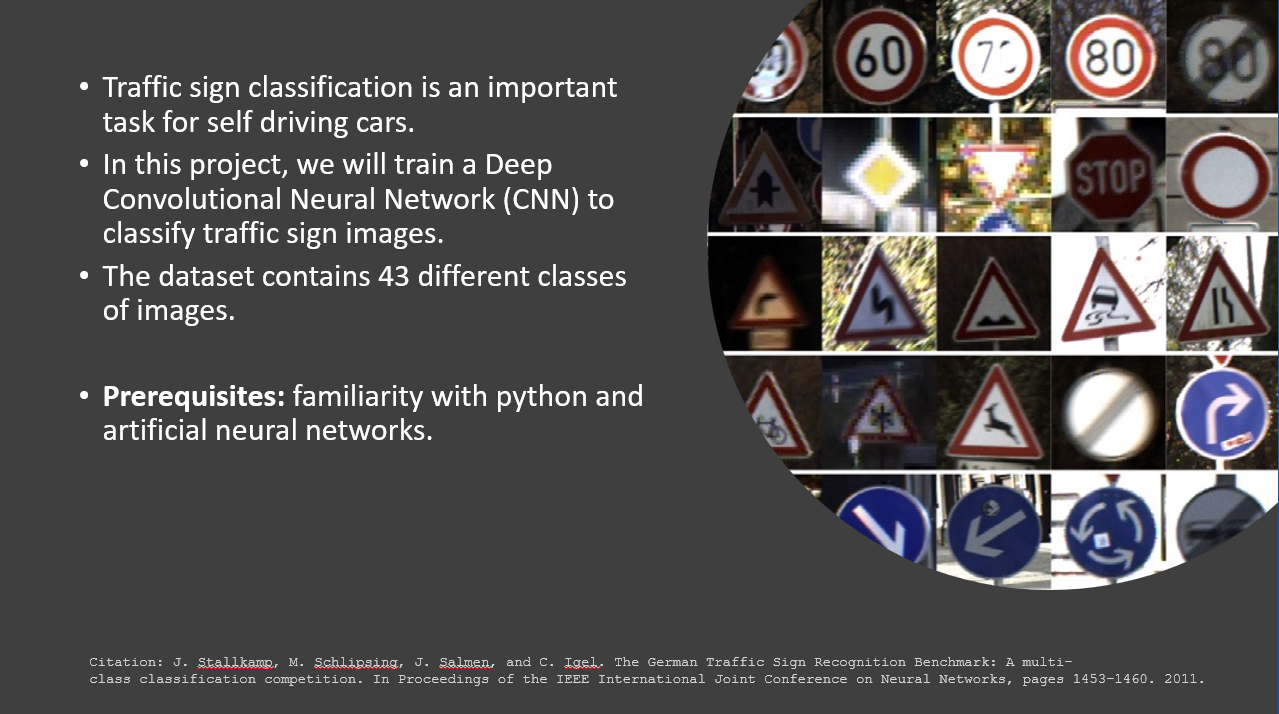

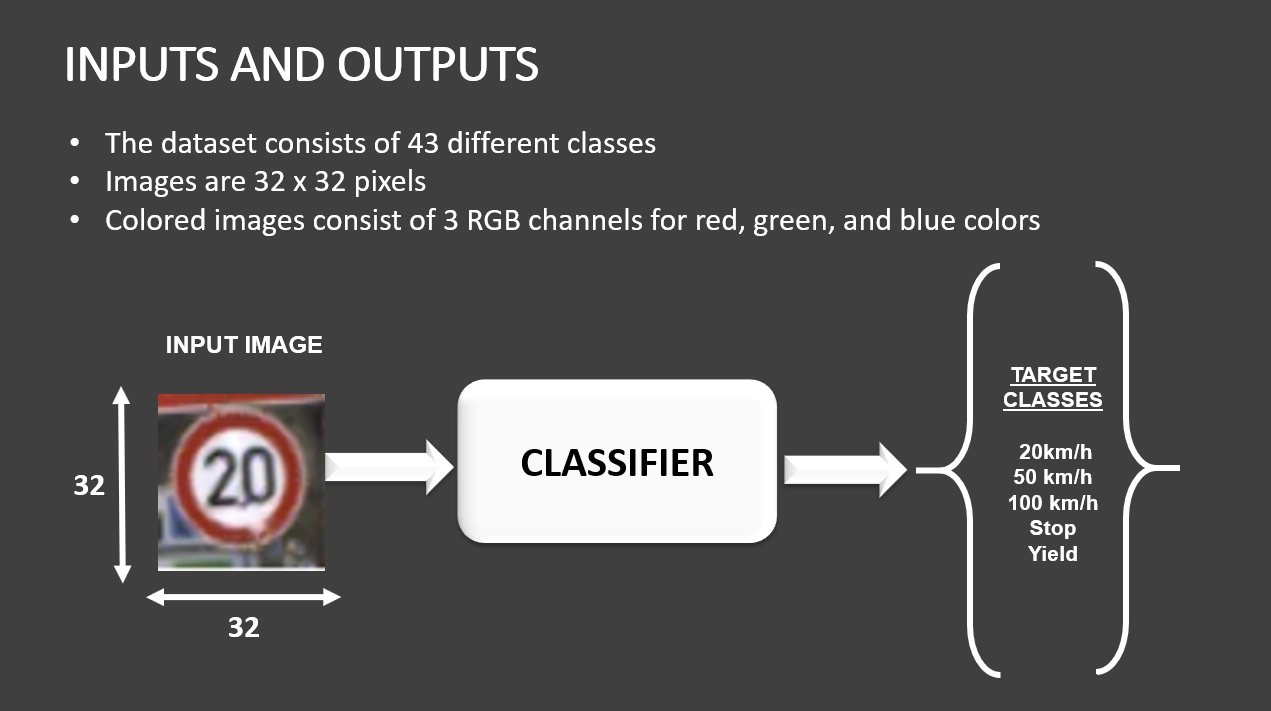

##  IMPORT LIBRARIES/DATASETS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

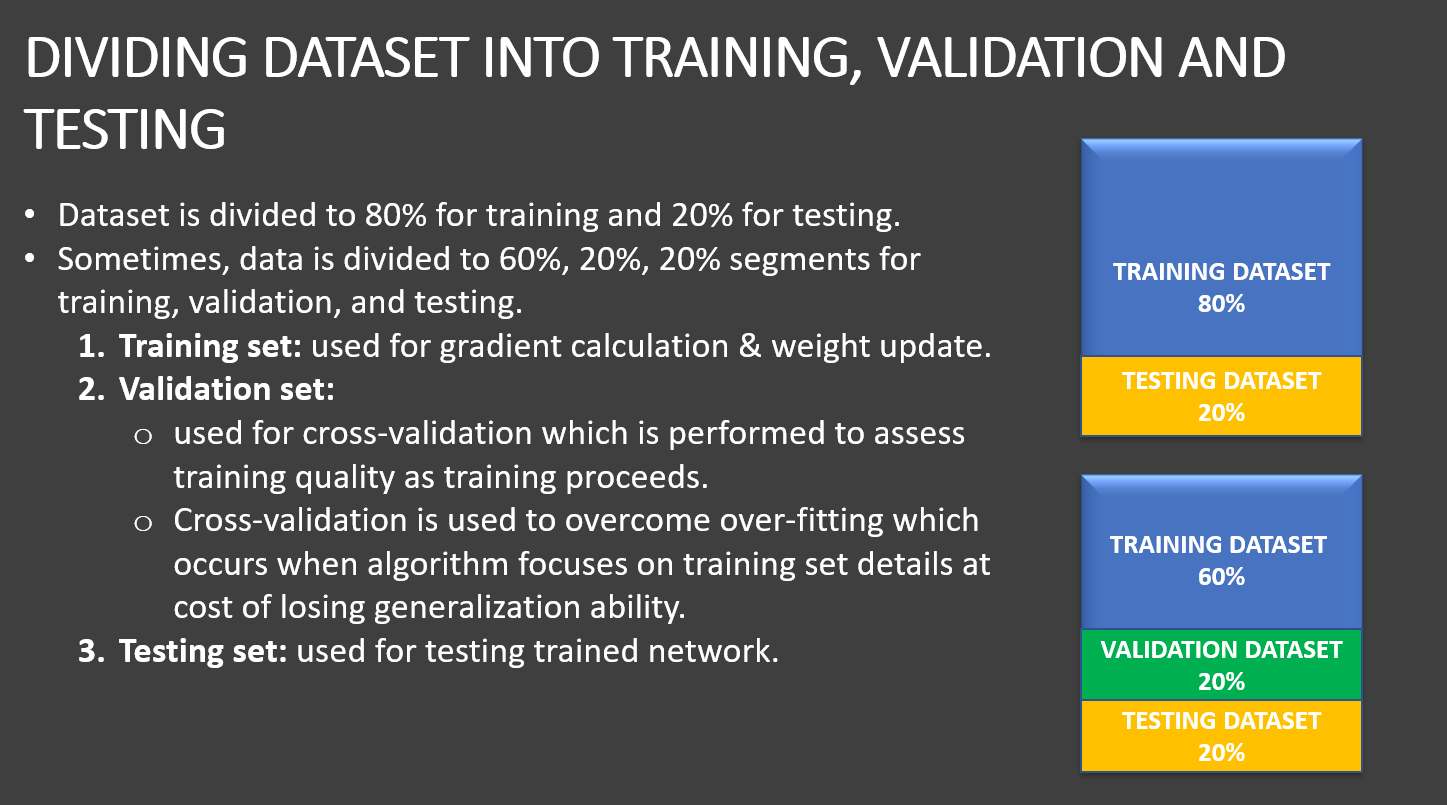

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train= train['features'], train['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [21]:
X_train, y_train= train['features'], train['labels']
X_valid, y_valid= valid['features'], valid['labels']
X_test, y_test= test['features'], test['labels']

## PERFORM IMAGES VISUALIZATION

17

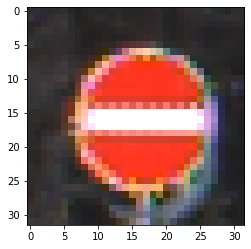

In [11]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

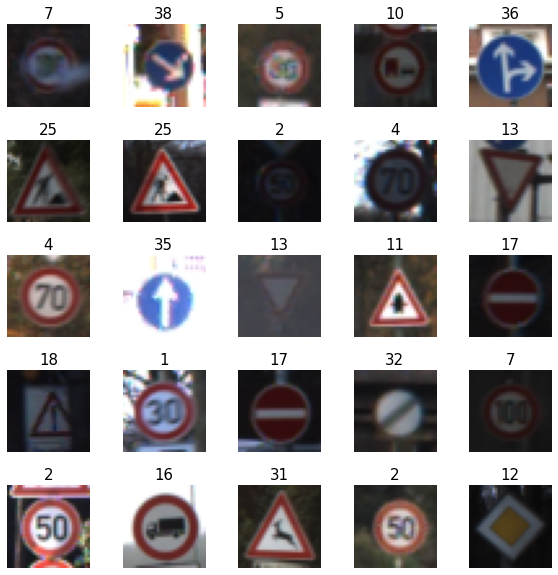

In [13]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(i, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize= 15)
    axes[i].axis('off')
plt.subplots_adjust(hspace= 0.4)

        

## CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [14]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [22]:
X_train_gray= np.sum(X_train/3, axis= 3, keepdims= True)
X_test_gray= np.sum(X_test/3, axis= 3, keepdims= True)
X_valid_gray= np.sum(X_valid/3, axis= 3, keepdims= True)


In [16]:
X_train_gray.shape

(34799, 32, 32, 1)

In [23]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128

In [18]:
X_train_gray_norm

array([[[[-0.6796875 ],
         [-0.68489583],
         [-0.66145833],
         ...,
         [-0.609375  ],
         [-0.59114583],
         [-0.37239583]],

        [[-0.65104167],
         [-0.68229167],
         [-0.65885417],
         ...,
         [-0.55208333],
         [-0.61458333],
         [-0.484375  ]],

        [[-0.45572917],
         [-0.58854167],
         [-0.63802083],
         ...,
         [-0.515625  ],
         [-0.625     ],
         [-0.55208333]],

        ...,

        [[ 0.9765625 ],
         [ 0.59375   ],
         [ 0.19270833],
         ...,
         [-0.61979167],
         [-0.64583333],
         [-0.63802083]],

        [[ 0.96875   ],
         [ 0.5703125 ],
         [ 0.22916667],
         ...,
         [-0.61197917],
         [-0.64322917],
         [-0.63802083]],

        [[ 0.953125  ],
         [ 0.53385417],
         [ 0.1015625 ],
         ...,
         [-0.62239583],
         [-0.63020833],
         [-0.63541667]]],


       [[[ 0.9921875 ],


In [25]:
X_valid_gray_norm

array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


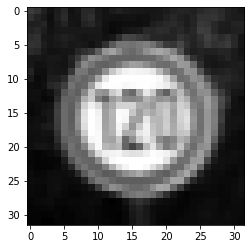

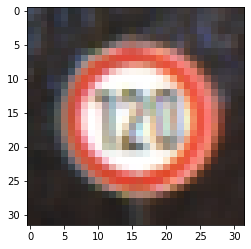

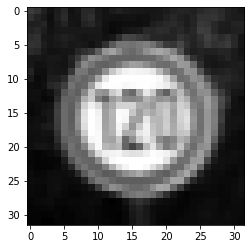

In [27]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

## UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

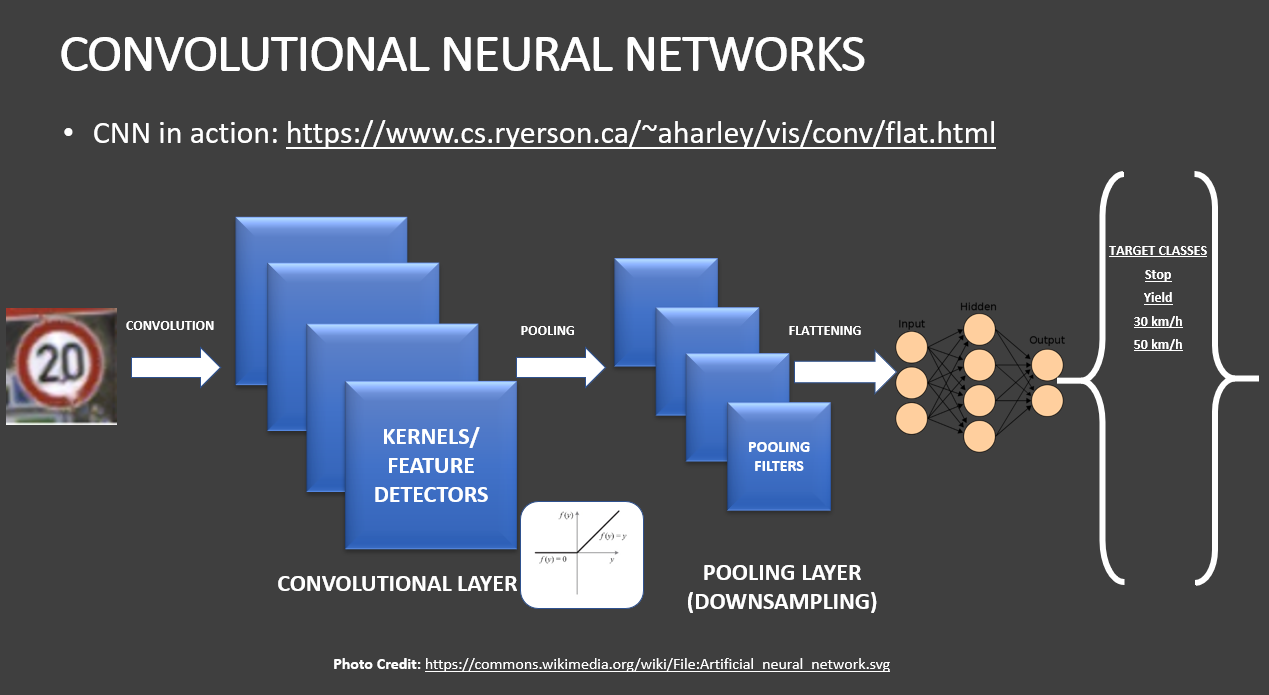

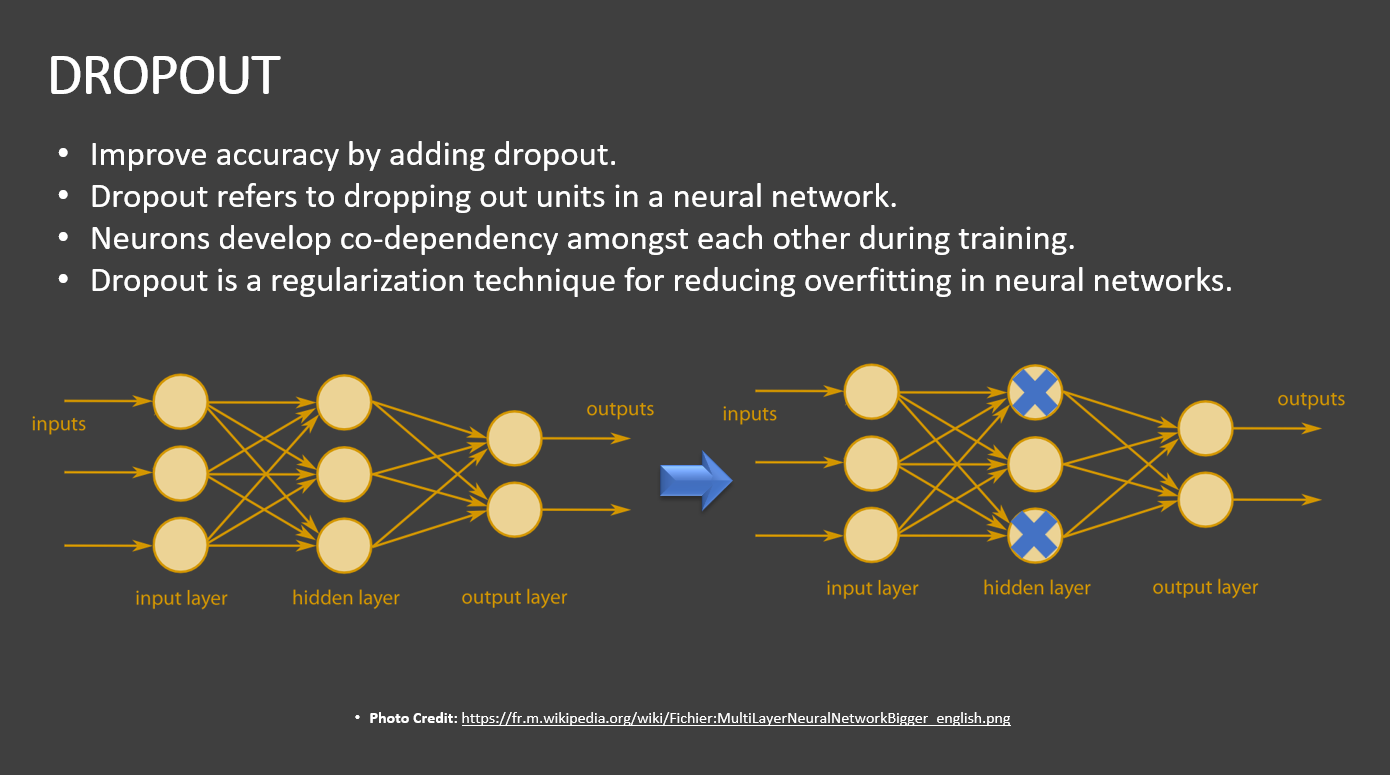

## BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [31]:
from tensorflow.keras import datasets, layers, models

CNN= models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation= 'relu', input_shape= (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation= 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation='relu'))

CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(43, activation= 'softmax'))
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

## COMPILE AND TRAIN DEEP CNN MODEL

In [33]:
CNN.compile(optimizer= 'Adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])


In [37]:
history= CNN.fit(X_train_gray_norm, y_train, batch_size= 500, epochs= 50, verbose= 1, validation_data= (X_valid_gray_norm, y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 24s 700us/sample - loss: 0.6014 - accuracy: 0.8229 - val_loss: 0.6518 - val_accuracy: 0.8041
Epoch 2/50
34799/34799 [==============================] - 23s 673us/sample - loss: 0.5125 - accuracy: 0.8518 - val_loss: 0.5831 - val_accuracy: 0.8265
Epoch 3/50
34799/34799 [==============================] - 25s 705us/sample - loss: 0.4423 - accuracy: 0.8744 - val_loss: 0.5353 - val_accuracy: 0.8447
Epoch 4/50
34799/34799 [==============================] - 24s 692us/sample - loss: 0.4047 - accuracy: 0.8812 - val_loss: 0.5259 - val_accuracy: 0.8361
Epoch 5/50
34799/34799 [==============================] - 24s 677us/sample - loss: 0.3533 - accuracy: 0.8977 - val_loss: 0.4937 - val_accuracy: 0.8565
Epoch 6/50
34799/34799 [==============================] - 25s 706us/sample - loss: 0.3149 - accuracy: 0.9086 - val_loss: 0.4429 - val_accuracy: 0.8794
Epoch 7/50
34799/34799 [=====================

## ASSESS TRAINED CNN MODEL PERFORMANCE 

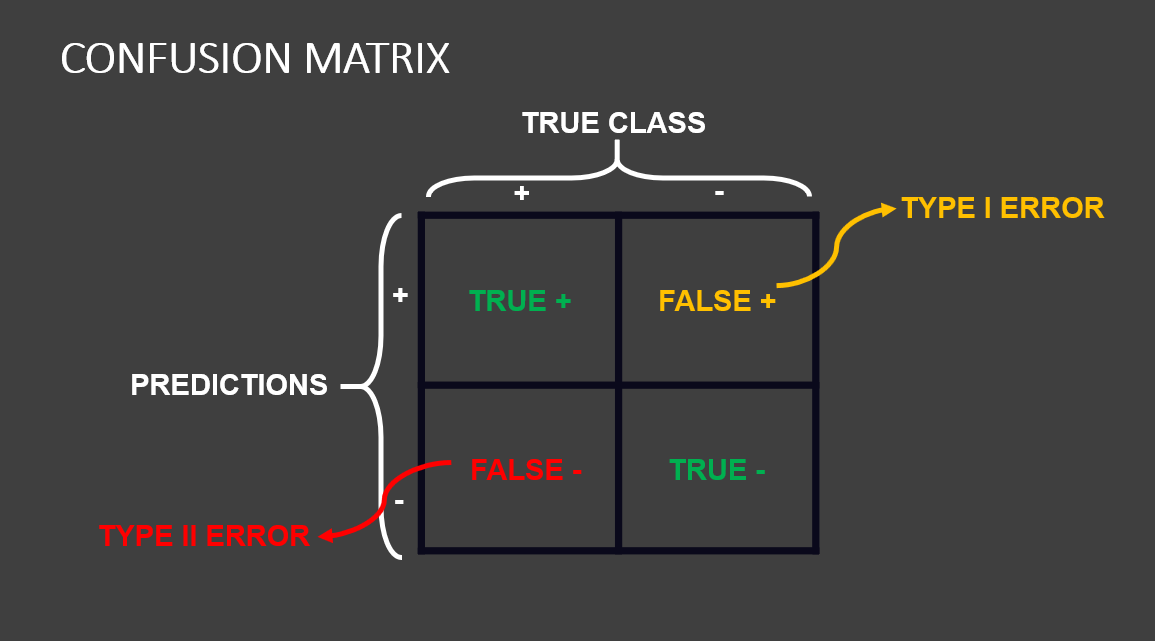

In [38]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 6s 483us/sample - loss: 0.6432 - accuracy: 0.9043
Test Accuracy: 0.9042755365371704


In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

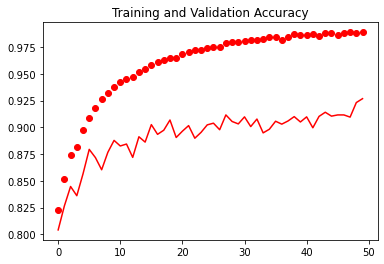

In [42]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label= 'Training loss')
plt.plot(epochs, val_accuracy, 'r', label= 'Validation Loss')
plt.title('Training and Validation Accuracy')

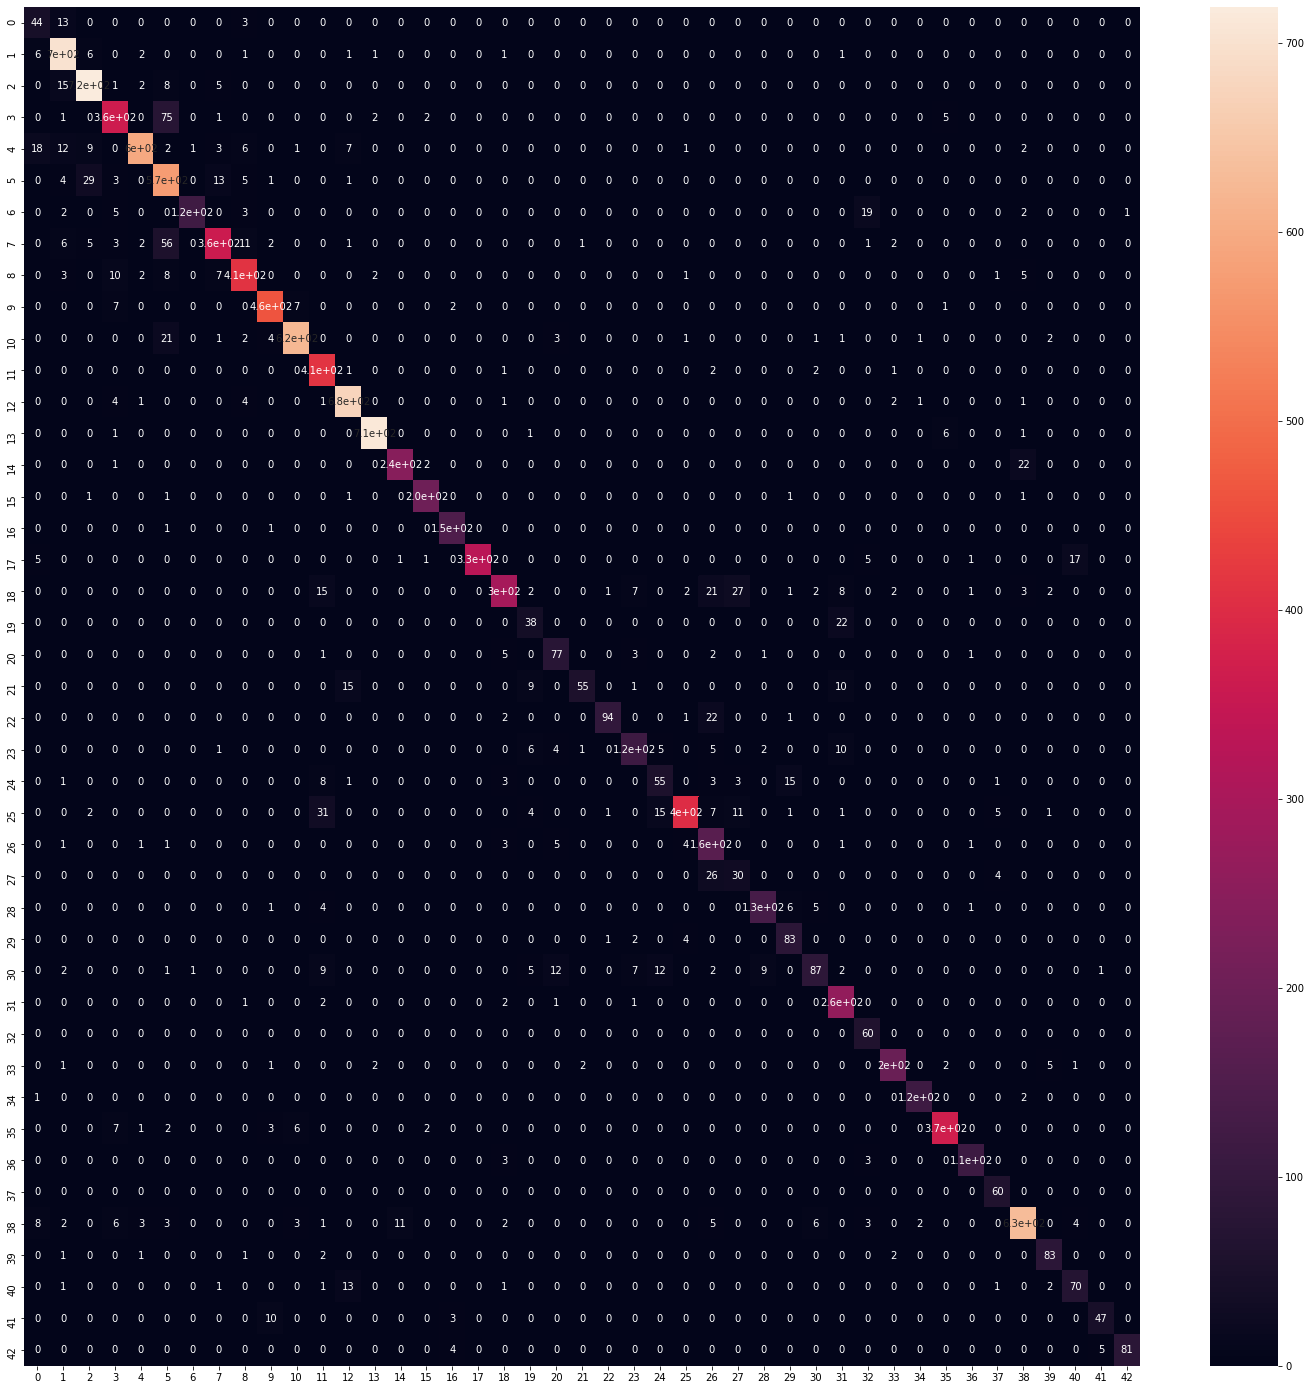

In [43]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

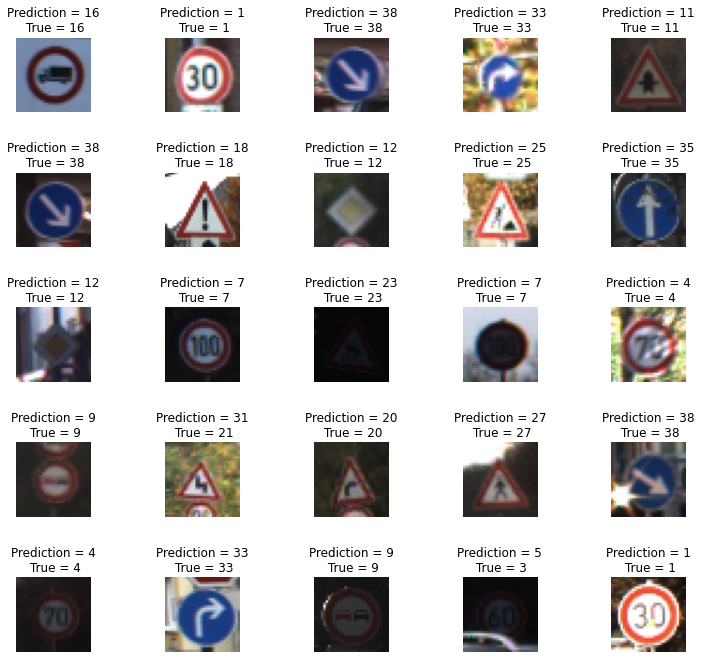

In [44]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

## APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453â€“1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }